# hossam eldein mohamed osman G1 nasser 

# Travelling Salesman problem

# 1) Application
### The travelling salesman problem arises in many different contexts. In this paper we report on typical applications in computer wiring, vehicle routing, clustering and job-shop scheduling. The formulation as a travelling salesman problem is essentially the simplest way to solve these problems. Most applications originated from real world problems and thus seem to be of particular interest. Illustrated examples are provided with each application. 
https://scholar.google.com.eg/scholar_url?url=https://ir.cwi.nl/pub/21825/21825A.pdf&hl=ar&sa=X&ei=1j4NYsrIIqyXy9YP0aqLiAE&scisig=AAGBfm0V38AGxmImJKkEf3v6M4pb2isA5Q&oi=scholarr

# 2) P or NP-Hard?
### Travelling Salesman problem is NP-Hard
https://www.geeksforgeeks.org/travelling-salesman-problem-set-1/


# implement using (greedy)

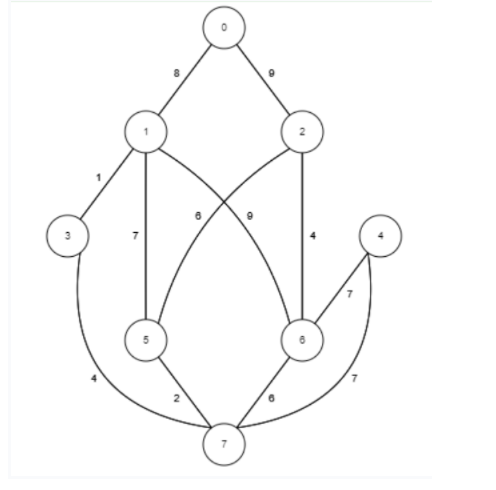

In [40]:
def get_key(val,my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key
def min_pos(current_pos,c):
    disanc_list=[]
    d=c[current_pos]
    for i in d :
        disanc_list.append(c[current_pos][i])
    return  disanc_list
    
    
    
def Greedy_TSP(start_pos,c):
    current_pos=start_pos
    v=[]
    cost=0
    i=0
    while len(v)<len(c):
        m=min_pos(current_pos,c)
        m.sort()
        
        next_pos=get_key(m[i],c[current_pos])
        if next_pos in v:
             if i== len(m)-1:
               return v , cost
             i=i+1
             continue
        v.append(next_pos)
        cost+=m[i]
        current_pos=next_pos
        i=0
   
graph = {
                    0: {1:8, 2:9},
                    1: {0:8, 5:7, 3:1, 6:9},
                    2: {0:9, 5:6, 6:4},
                    3: {1:1, 7:4},
                    4: {7:7, 6:7},
                    5: {1:7, 2:6, 7:2},
                    6: {1:9, 2:4, 4:7, 7:6},
                    7: {3:4, 4:7, 5:2, 6:6}
                }


print(Greedy_TSP(0,graph))       

([1, 3, 7, 5, 2, 6, 4], 32)


## implement using (dynamic programing)

In [52]:
import time
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline
def DP_TSP(distances_array):
  n = len(distances_array)
  all_points_set = set(range(n))
  
  # memo keys: tuple(sorted_points_in_path, last_point_in_path)
  # memo values: tuple(cost_thus_far, next_to_last_point_in_path)
  memo = {(tuple([i]), i): tuple([0, None]) for i in range(n)}
  queue = [(tuple([i]), i) for i in range(n)]
  
  while queue:
    prev_visited, prev_last_point = queue.pop(0)
    prev_dist, _ = memo[(prev_visited, prev_last_point)]
    to_visit = all_points_set.difference(set(prev_visited))
    
    for new_last_point in to_visit:
      new_visited = tuple(sorted(list(prev_visited) + [new_last_point]))
      new_dist = (prev_dist + distances_array[prev_last_point][new_last_point])
      
      if (new_visited, new_last_point) not in memo:
        memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
        queue += [(new_visited, new_last_point)]
      else:
        if new_dist < memo[(new_visited, new_last_point)][0]:
          memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
          
  optimal_path, optimal_cost = retrace_optimal_path(memo, n)
  return optimal_path, optimal_cost
input_size = 12
X, distances_array = generate_random_input(input_size)

t = time.time()
optimal_path, optimal_cost = DP_TSP(distances_array)
print(str(optimal_path)+str(optimal_cost))
   

([1, 3, 7, 5, 2, 6, 4], 32)
